In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


In [146]:
credit_data = pd.read_csv("credit.csv")

In [147]:
credit_data

,Unnamed: 0,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,1,0,0.457619,0.224064,0.031838,1.288137,0.318193
1,2,0,0.121053,-0.114041,0.037298,0.457176,0.312122
2,3,0,-0.034844,-0.041509,0.017398,0.086529,0.186875
3,4,0,-0.007908,0.164338,0.045521,0.622297,0.106294
4,5,0,0.159241,0.429216,0.069642,5.060882,0.220953
...,...,...,...,...,...,...,...
739,740,1,0.028728,-1.846117,0.033956,0.034680,0.678044
740,741,1,0.172167,-0.068613,-0.004699,0.043519,0.235299
741,742,1,0.005588,-0.260068,0.036878,0.298255,0.148100
742,743,1,-0.994230,-0.433532,-0.000244,0.035502,0.330467


In [148]:
X = credit_data.drop('Default', axis=1)
y = credit_data['Default']

In [149]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [150]:
model = sklearn.linear_model.LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [151]:
coefficients = model.coef_
print("Coefficients:",coefficients)

Coefficients: [[ 0.00385799  0.42147029 -0.97020003 -0.45300681 -1.44023281  0.48211964]]


In [152]:
y_prediction = model.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_prediction)
print("R^2:", r2)

R^2: 0.26726948548140605


In [153]:
y_pred_test = model.predict(X_test)
confusion = sklearn.metrics.confusion_matrix(y_test, y_pred_test)
print(confusion)

[[70  0]
 [ 2  3]]


In [154]:
prob = model.predict_proba(X_test)[:,1]

In [155]:
roc_auc = sklearn.metrics.roc_auc_score(y_test, prob)
roc_auc

0.9942857142857143

In [156]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, prob)

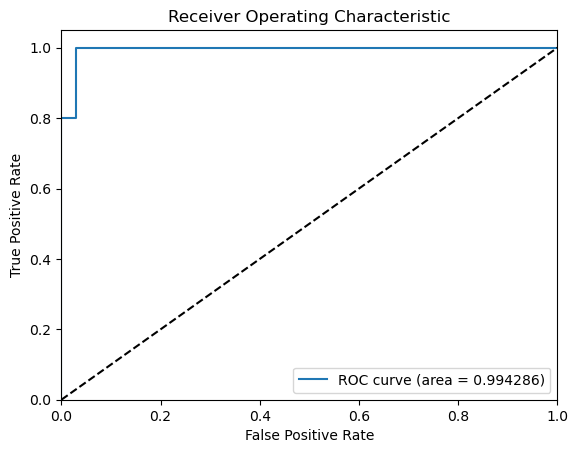

In [157]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [158]:
loo = sklearn.model_selection.LeaveOneOut()
loo_auc = sklearn.model_selection.cross_val_score(model, X, y, cv=loo, scoring='roc_auc')

k_fold = sklearn.model_selection.StratifiedKFold(n_splits=10)
kf_auc = sklearn.model_selection.cross_val_score(model, X, y, cv=k_fold, scoring='roc_auc')


/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py", line 626, in roc_auc_score
    return

In [159]:
kf_auc

array([0.82142857, 0.94957983, 0.96218487, 1.        , 0.49680171,
       1.        , 1.        , 0.99360341, 0.90618337, 0.98507463])

In [160]:
selector = RFE(model, n_features_to_select=1)
selector.fit(X, y)

print("Ranking of features: ", selector.ranking_)

Ranking of features:  [6 5 2 4 1 3]


In [161]:
kf = sklearn.model_selection.KFold(n_splits=10, shuffle=True)

In [162]:
lasso_model = sklearn.linear_model.LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso_predictions = sklearn.model_selection.cross_val_predict(lasso_model, X, y, cv=kf, method='predict_proba')[:, 1]
fpr_lasso, tpr_lasso, _ = sklearn.metrics.roc_curve(y, lasso_predictions)
auc_lasso = sklearn.metrics.auc(fpr_lasso, tpr_lasso)

ridge_model = sklearn.linear_model.LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
ridge_predictions = sklearn.model_selection.cross_val_predict(ridge_model, X, y, cv=kf, method='predict_proba')[:,1]
fpr_ridge, tpr_ridge, _ = sklearn.metrics.roc_curve(y, ridge_predictions)
auc_ridge = sklearn.metrics.auc(fpr_ridge, tpr_ridge)

elastic_model = sklearn.linear_model.LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elastic_predictions = sklearn.model_selection.cross_val_predict(elastic_model, X, y, cv=kf, method='predict_proba')[:, 1]
fpr_elastic, tpr_elastic, _ = sklearn.metrics.roc_curve(y, elastic_predictions)
auc_elastic = sklearn.metrics.auc(fpr_elastic, tpr_elastic)

print("LASSO AUC:", auc_lasso)
print("Ridge AUC:", auc_ridge)
print("Elastic Net AUC:", auc_elastic)

best_auc = max(auc_ridge, auc_lasso, auc_elastic)
if best_auc == auc_ridge:
    print("Best model: Ridge Regression")
elif best_auc == auc_lasso:
    print("Best model: LASSO Regression")
else:
    print("Best model: Elastic Net Regression")
print("AUC:", best_auc)

LASSO AUC: 0.8662780839338703
Ridge AUC: 0.8771937261551505
Elastic Net AUC: 0.8704323866044935
Best model: Ridge Regression
AUC: 0.8771937261551505


In [163]:
turkish_yield = pd.read_csv("turkish_yields.csv")

In [164]:
turkish_yield['Unnamed: 0']= pd.to_datetime(turkish_yield['Unnamed: 0'], format='%d.%m.%Y')

In [165]:
turkish_yield.rename(columns={'Unnamed: 0':'Date'},inplace=True)

In [166]:
turkish_yield.describe()

,Date,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600
count,2659,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000
mean,2016-08-16 12:00:16.246709248,11.555316,11.689976,11.834735,11.989251,12.043765,11.993279,11.849195,11.710016,11.530420
min,2011-05-04 00:00:00,3.709000,3.921700,4.214300,4.501900,4.932600,5.238500,5.703000,6.015500,5.767400
25%,2013-12-26 12:00:00,8.297123,8.412450,8.603300,8.796650,9.121300,9.233600,9.295850,9.373950,9.396300
50%,2016-08-15 00:00:00,9.908400,10.019200,10.160200,10.465200,10.777800,10.896400,10.770100,10.604226,10.476800
75%,2019-04-04 12:00:00,13.378012,13.566714,13.739037,13.901249,13.973995,13.936496,13.521024,13.282123,13.301136
max,2021-12-07 00:00:00,30.444690,29.088428,28.449142,27.780526,28.835422,28.352370,26.667753,24.238348,21.177129
std,NaN,5.090165,4.962308,4.832621,4.682574,4.457020,4.252555,3.888416,3.564807,3.158489


In [167]:
monthly_data = turkish_yield.resample('M', on='Date').mean()

positive_yields_10 = (monthly_data['X3600']>0).sum()
positive_yields_2 = (monthly_data['X720']>0).sum()
print("Number of positive yields for 2 years bonds:",positive_yields_2)
print("Number of positive yields for 10 years bonds:",positive_yields_10)

Number of positive yields for 2 years bonds: 128
Number of positive yields for 10 years bonds: 128


In [168]:
turkish_yield['Spread'] = turkish_yield['X3600'] - turkish_yield['X720']

In [169]:
flattened = turkish_yield['Spread'].quantile(0.25)
steepened = turkish_yield['Spread'].quantile(0.75)

In [170]:
flattened_periods = turkish_yield[turkish_yield['Spread']<=flattened].sort_values(by='Date').head(3)
steepened_periods = turkish_yield[turkish_yield['Spread']<=steepened].sort_values(by='Date').head(3)

In [171]:
flattened_periods

,Date,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600,Spread
143,2011-11-30,9.7435,9.9977,10.2254,10.3807,10.4412,10.4229,10.2570,9.9801,9.4742,-0.9670
157,2011-12-20,10.7321,10.8679,10.9069,10.7253,10.3602,10.1168,9.7873,9.5602,9.2906,-1.0696
158,2011-12-21,10.6318,10.7244,10.7728,10.6996,10.4616,10.2466,9.9104,9.6698,9.3857,-1.0759


In [172]:
steepened_periods

,Date,X30,X90,X180,X360,X720,X1080,X1800,X2520,X3600,Spread
11,2011-05-20,7.4574,7.7948,8.1510,8.6236,9.0714,9.2531,9.4211,9.4998,9.5523,0.4809
12,2011-05-23,7.5454,7.8647,8.2215,8.6888,9.1157,9.2749,9.4175,9.4936,9.5643,0.4486
13,2011-05-24,7.4995,7.8998,8.2735,8.7097,9.1092,9.2704,9.4131,9.4702,9.4884,0.3792


In [173]:
turkish_yield['Year']=turkish_yield['Date'].dt.year

In [174]:
data_2013 = turkish_yield[turkish_yield['Year'] == 2013].iloc[:,1:-1]
data_2018 = turkish_yield[turkish_yield['Year'] == 2018].iloc[:, 1:-1]
data_2019 = turkish_yield[turkish_yield['Year'] == 2019].iloc[:, 1:-1]

In [175]:
def pc_a(x):
    pca = PCA(n_components=2)
    pca.fit(x)
    components = pca.components_
    index = np.argmax(np.abs(components), axis=1)
    names = x.columns[index]
    return pca.explained_variance_ratio_, names

In [176]:
print("First two principal components explain variation respectively for 2013:",pc_a(data_2013))
print("First two principal components explain variation respectively for 2018:",pc_a(data_2018))
print("First two principal components explain variation respectively for 2019:",pc_a(data_2019))

First two principal components explain variation respectively for 2013: (array([0.96947556, 0.02082304]), Index(['X720', 'X30'], dtype='object'))
First two principal components explain variation respectively for 2018: (array([0.90017495, 0.08058463]), Index(['X360', 'X30'], dtype='object'))
First two principal components explain variation respectively for 2019: (array([0.94549879, 0.03766173]), Index(['X30', 'X30'], dtype='object'))


In [177]:
logit1=pd.read_csv('logit1.csv')

In [178]:
X2 = logit1.drop(columns=['default'])
y2 = logit1['default']

In [179]:
X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X2,y2,test_size=0.2)

In [180]:
X2_train.shape, X2_test.shape

((3200, 5), (800, 5))

In [181]:
neurons = [1, 2, 3]
models = []
histories = []

In [182]:
from sklearn.neural_network import MLPClassifier

In [183]:
def train_mlp(x):
    mlp = MLPClassifier(hidden_layer_sizes=x, max_iter=1000)
    mlp.fit(X2_train, y2_train)
    return mlp

In [184]:
mlp_models = [train_mlp(n) for n in neurons]

In [185]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

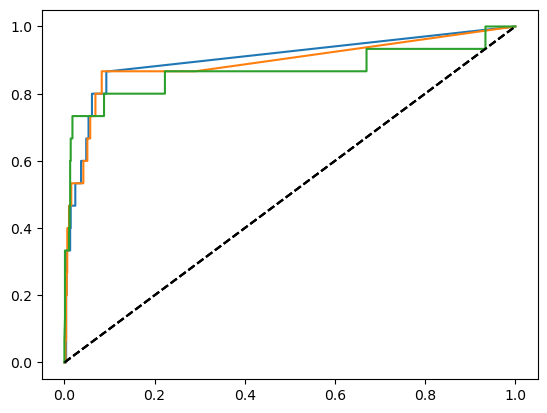

In [186]:
for i, mlp in enumerate(mlp_models):
    y_pred_prob = mlp.predict_proba(X2_test)[:, 1]
    fpr2, tpr2, _ = sklearn.metrics.roc_curve(y2_test, y_pred_prob)
    auc = sklearn.metrics.roc_auc_score(y2_test, y_pred_prob)
    
    plt.plot(fpr2, tpr2, label=f'Model with {neurons[i]} Neuron(s) - AUC: {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')

In [187]:
auc_scores = [sklearn.metrics.roc_auc_score(y2_test, mlp.predict_proba(X2_test)[:, 1]) for i in mlp_models]
best_model_index = auc_scores.index(max(auc_scores))
best_model_neurons = neurons[best_model_index]
best_model_index, best_model_neurons, auc_scores

(0, 1, [0.8667940552016986, 0.8667940552016986, 0.8667940552016986])

In [188]:
mlp_models

[MLPClassifier(hidden_layer_sizes=1, max_iter=1000),
 MLPClassifier(hidden_layer_sizes=2, max_iter=1000),
 MLPClassifier(hidden_layer_sizes=3, max_iter=1000)]

In [189]:
best_model = mlp_models[best_model_index]
y_pred_prob_best = best_model.predict_proba(X2_test)[:,1]

thresholds = np.linspace(0, 1, 100)
accuracy_scores = []

for i in thresholds:
    y_pred_best = (y_pred_prob_best >= i).astype(int)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y2_test, y_pred_best).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

In [190]:
best_threshold_index = np.argmax(accuracy_scores)
best_threshold = thresholds[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

best_threshold, best_accuracy

(0.22222222222222224, 0.9825)

In [191]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [192]:
y_pred_probability = dt_model.predict_proba(X2_test)[:, 1]

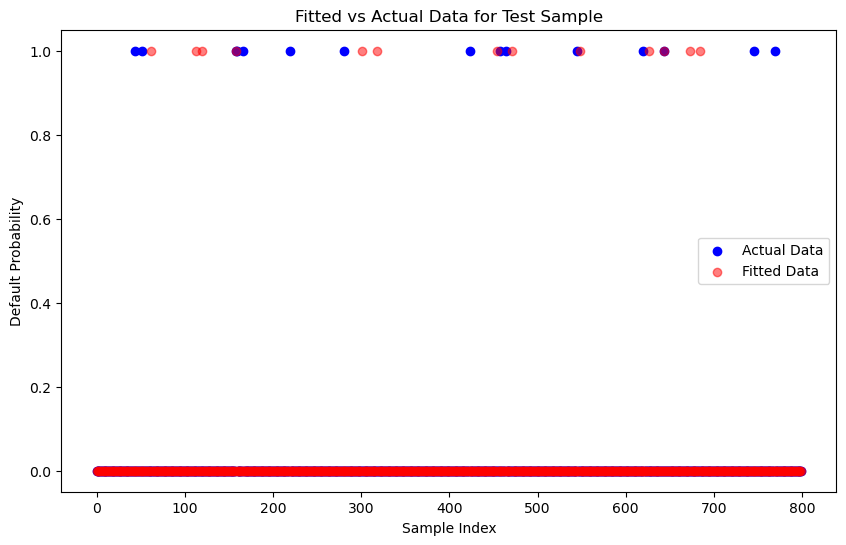

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y2_test)), y2_test, color='blue', label='Actual Data')
plt.scatter(range(len(y2_test)), y_pred_probability, color='red', label='Fitted Data', alpha=0.5)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Default Probability')
plt.title('Fitted vs Actual Data for Test Sample')
plt.show()


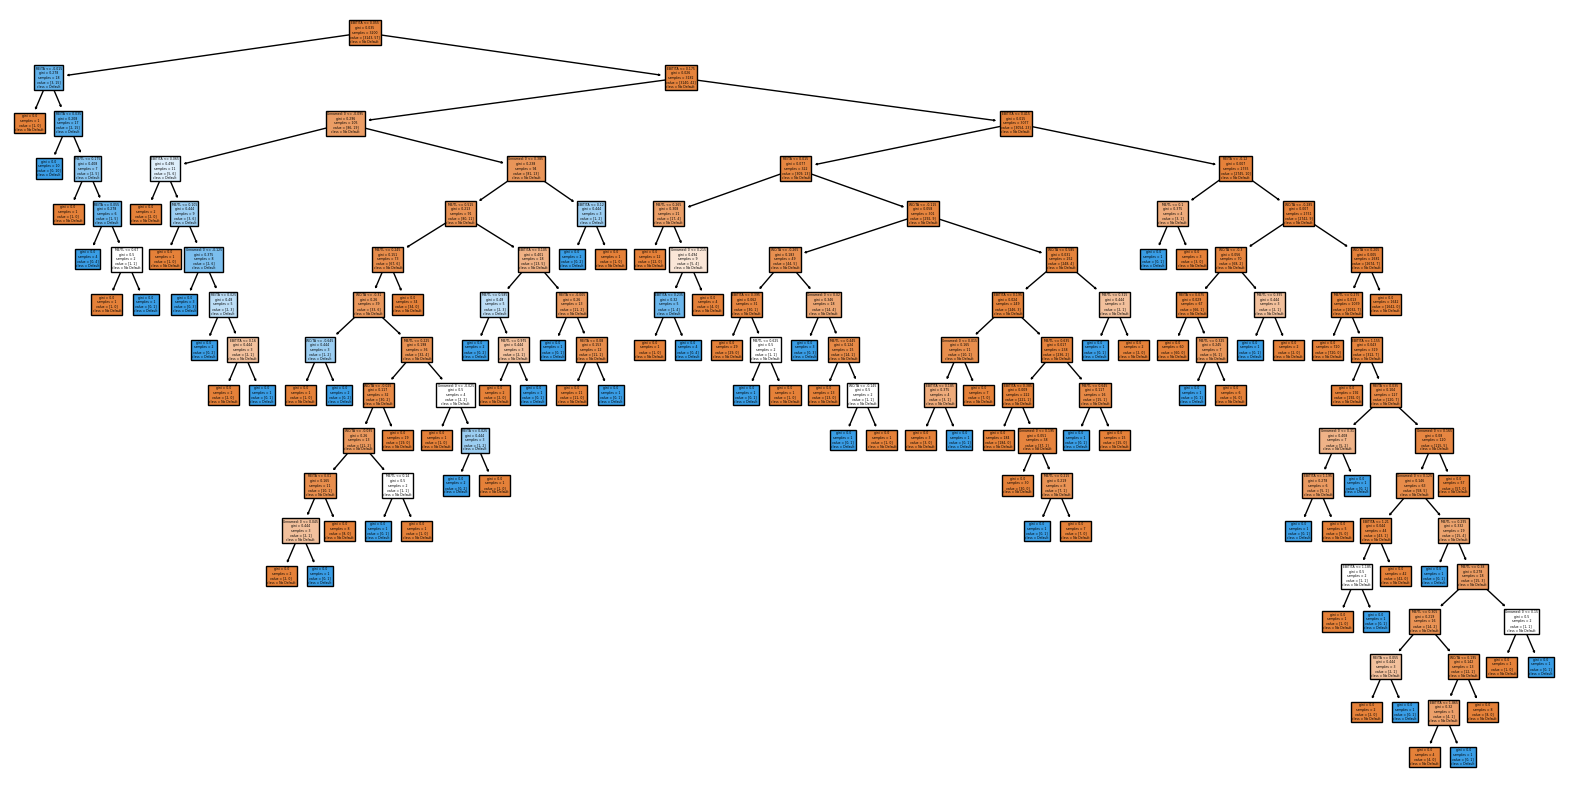

In [196]:
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(dt_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Default', 'Default'])
plt.show()

In [197]:
threshold = 0.75
y_predi = (y_pred_probability >= threshold).astype(int)
confusion_matrix = sklearn.metrics.confusion_matrix(y2_test, y_predi)
TN, FP, FN, FP = confusion_matrix.ravel()

In [198]:
truth_table = pd.DataFrame(confusion_matrix, columns=['Predicted No Default', 'Predicted Default'], index=['Actual No Default', 'Actual Default'])
accuracy_ratio = accuracy_score(y2_test, y_predi)

In [199]:
print("Truth Table:")
print(truth_table)
print("\nAccuracy Ratio: {:.2f}".format(accuracy_ratio))

Truth Table:
                   Predicted No Default  Predicted Default
Actual No Default                   774                 11
Actual Default                       13                  2

Accuracy Ratio: 0.97


In [200]:
FPT, TPR, _ = sklearn.metrics.roc_curve(y2_test, y_pred_probability)
roc_auc2 = sklearn.metrics.roc_auc_score(y2_test, y_pred_probability)

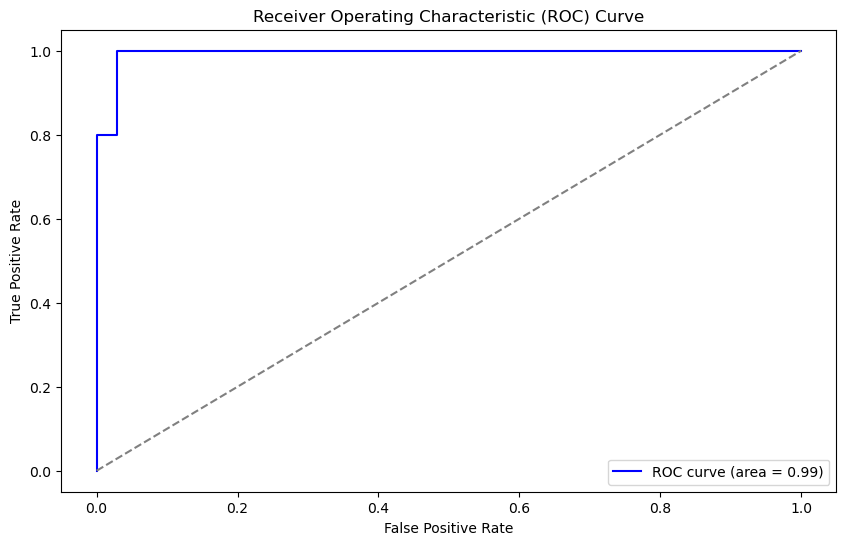

In [201]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()